About this Dataset https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation/data

Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.
Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
Acknowledgements

From Udemy's Machine Learning A-Z course.

I am new to Data science field and want to share my knowledge to others

https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv
Inspiration

By the end of this case study , you would be able to answer below questions. 1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way. 2- Who are your target customers with whom you can start marketing strategy [easy to converse] 3- How the marketing strategy works in real world 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Importing Data
Keep in mind that the data are unlabeled, so we are going to use unsupervised learning here.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

info() method gives information in which there are no missing values since each column has 200 entries.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Just to re check whether there is missing value.

In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Feature Selection
We are going to use 'annual income', and 'spending score' as the features.

In [28]:
#X = dataset.iloc[:, [3,4]].values    # I dont like this style
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### Building the KMeans Model (1: for doing the elbow method)
To figure out the value of K, we will use elbow method.

In [8]:
from sklearn.cluster import KMeans
wcss = []

WCSS (Within-Cluster-Sum-of-Squares) is an ideal way to figure out the right number of clusters.

In [9]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Visualizing the ELBOW method to get the optimal value of K.

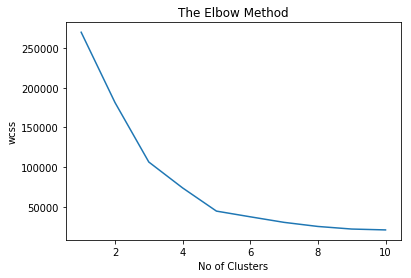

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

### Building the KMeans Model (2: to create the model that will be used to perform unsupervised learning)
So the last elbow comes at K=5, hence we will use that value.

In [17]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', 
                     random_state=0)
kmeansmodel.fit(X)
y_kmeans = kmeansmodel.predict(X)

### Visualizing all the clusters

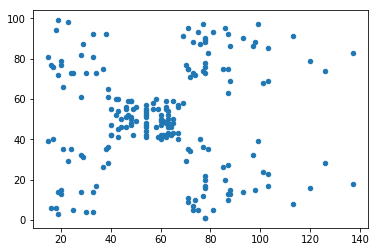

In [21]:
plt.scatter(X[:,0], X[:, 1], s=20)

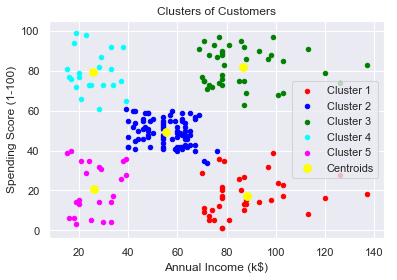

In [26]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, 
            c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, 
            c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, 
            c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=20, 
            c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=20, 
            c='magenta', label='Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0], 
            kmeansmodel.cluster_centers_[:,1], s=60, c='yellow', 
            label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### How to interpret the figure

    Cluster 1 (red)     : earning high but spending less
    Cluster 2 (Blue)    : average in terms of earning and spending 
    Cluster 3 (Green)   : earning high and also spending high (TARGET SET)
    Cluster 4 (cyan)    : earning less but spending more
    Cluster 5 (magenta) : Earning less , spending less

We can put Cluster 3 into some alerting system where email can be sent to them on daily basis as they are easy to spend money. On the other hand, we can send email to the others like once in a week or once in a month.

There are lots of things that we can find out from the data. e.g. Display only customer data which falls into cluster 3.

In [39]:
dataset['Cluster'] = y_kmeans
dataset[dataset['Cluster'] == 3].head()
#.groupby('CustomerID').sum()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3


Find out the average of each column of males and females which falls in cluster 3.

In [42]:
dataset[dataset['Cluster'] == 3].groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
Gender,,,,,
Female,22.769231,25.461538,25.692308,80.538462,3
Male,23.555556,25.000000,25.777778,77.666667,3
